<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/K-Means%20Clustering/From%20scratch/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means from scratch**


In [213]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
class KMeansClustering:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None
    # self.inertia_ = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum(np.square(data_point - centroids), axis=1))


  def fit(self, X, max_iterations=200):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),
                                       size=(self.k, X.shape[1]))
    for _ in range(max_iterations):
        y = []
        for data_point in X:
            distances = KMeansClustering.euclidean_distance(data_point, self.centroids) # return 'k' numbers of distances in an array
            cluster_num = np.argmin(distances)  # np.argmin returns the index of smallest value
            y.append(cluster_num)

        y = np.array(y)

        # Cluster assign:
        cluster_indices = []
        for i in range(self.k):
            cluster_indices.append(np.argwhere(y == i))

        # Repositioning the centroid
        cluster_centers = []
        for i, indices in enumerate(cluster_indices):
            if len(indices) == 0:
                cluster_centers.append(self.centroids[i])
            else:
                cluster_centers.append(np.mean(X[indices], axis=0)[0])

        # checking convergence
        if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
            break
        else:
            self.centroids = np.array(cluster_centers)

    return y

  def inertia_(self, X, y):
    inertia = 0
    for i in range(self.k):
        inertia += np.sum(np.square(X[y == i] - self.centroids[i]))
    return inertia



In [215]:
import pandas as pd

In [216]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [217]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


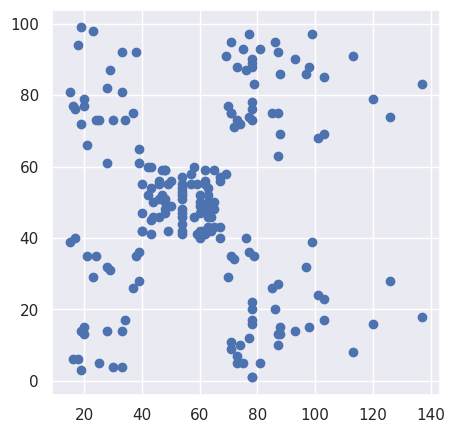

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [219]:
X = df.iloc[:,[3,4]].values

### Finding the best value of k

In [220]:
wcss = []

for i in range(1, 11):
  kmeans = KMeansClustering(k=i)
  y = kmeans.fit(X)
  inertia = kmeans.inertia_(X,y)
  wcss.append(inertia)

In [221]:
wcss

[439018.7524689834,
 181665.82312925172,
 106348.37306211118,
 98938.5390127545,
 44454.47647967974,
 37233.81451071001,
 31924.23890692641,
 56607.1789561099,
 28864.739926739927,
 25636.249277080224]

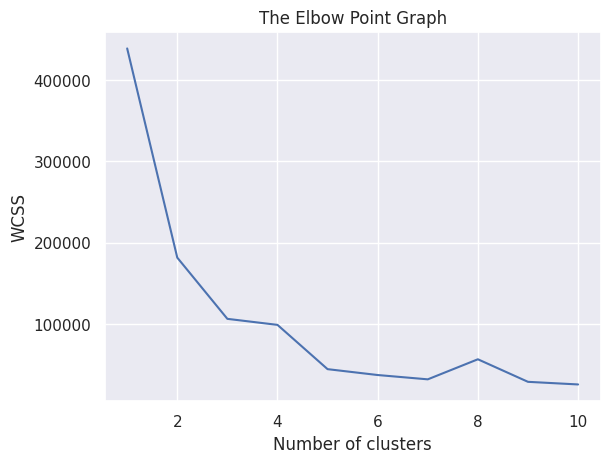

In [222]:
#Plotting the elbow curve
import seaborn as sns
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Found the best value of k. Now applying the algorithm:

In [223]:
kmeans = KMeansClustering(k=5)

In [224]:
Y = kmeans.fit(X, max_iterations=1000)

In [225]:
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [226]:
kmeans.centroids

array([[55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348]])

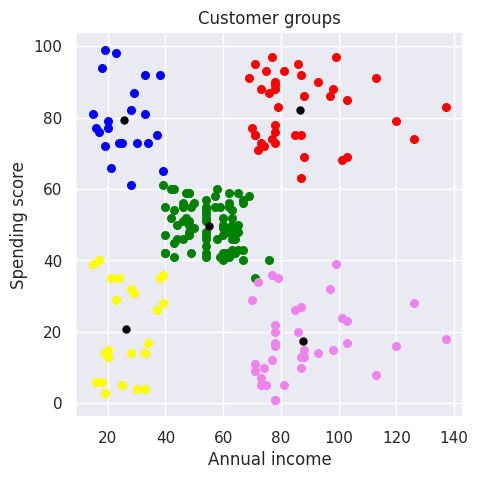

In [227]:

# Plotting all the clusters and their centroids
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=30, c='yellow', label='Cluster 5')

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='.', s=100,c='black', label='Centroids')

plt.title('Customer groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')

plt.show()